# Regression modeling

## 1. Linear Regression

In [37]:
import pylab as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
import seaborn as sns

pd.options.display.max_columns = 200
pd.options.display.max_rows = 500

In [38]:
DPP_DTT_df = pd.read_csv("combined3_df_DPP_DTT_step.csv")
DPP_DTT_df

,solution_concentration,polymer_mw,polymer_mn,polymer_dispersity,hole_mobility,solution_treatment,substrate_pretreatment,post_process,channel_width,channel_length,film_deposition_type_spin,dielectric_material_SiO2,electrode_configuration_BGBC,electrode_configuration_BGTC,electrode_configuration_TGBC,gate_material_Other,film_deposition_type_MGC,dielectric_material_other,solvent_boiling_point,delta_d,delta_p,delta_h,blend_conjugated_polymer,insulating_polymer,substrate_pretreat_sam,substrate_pretreat_plasma,substrate_pretreat_uv_ozone,solution_treatment_poor_solvent,solution_treatment_aging,solution_treatment_sonication,solution_treatment_mixing,solution_treatment_mixing_multiple,solution_treatment_uv_irradiation,post_process_annealing,post_process_drying,post_process_chemical
0,4.00,299.00,90.000,3.32,0.110000,0,0,1,1500,80,1,1,0,1,0,0,0,0,132.0,9.29,2.10,0.98,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,4.00,299.00,90.000,3.32,0.290000,0,1,1,1500,80,1,1,0,1,0,0,0,0,132.0,9.29,2.10,0.98,0,0,1,0,0,0,0,0,0,0,0,1,0,0
2,4.00,299.00,90.000,3.32,0.230000,0,1,1,1500,80,1,1,0,1,0,0,0,0,132.0,9.29,2.10,0.98,0,0,1,0,0,0,0,0,0,0,0,1,0,0
3,4.00,299.00,90.000,3.32,0.730000,0,1,1,1500,80,1,1,0,1,0,0,0,0,132.0,9.29,2.10,0.98,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,4.00,299.00,90.000,3.32,1.860000,0,1,1,1500,80,1,1,0,1,0,0,0,0,132.0,9.29,2.10,0.98,0,0,1,0,0,0,0,0,0,0,0,1,0,0
5,4.00,299.00,90.000,3.32,0.210000,0,1,1,1500,80,1,1,0,1,0,0,0,0,132.0,9.29,2.10,0.98,0,0,2,0,0,0,0,0,0,0,0,1,0,0
6,4.00,299.00,90.000,3.32,0.340000,0,1,1,1500,80,1,1,0,1,0,0,0,0,132.0,9.29,2.10,0.98,0,0,2,0,0,0,0,0,0,0,0,1,0,0
7,4.00,299.00,90.000,3.32,0.240000,0,1,1,1500,80,1,1,0,1,0,0,0,0,132.0,9.29,2.10,0.98,0,0,2,0,0,0,0,0,0,0,0,1,0,0
8,4.00,299.00,90.000,3.32,1.970000,0,1,1,1500,80,1,1,0,1,0,0,0,0,132.0,9.29,2.10,0.98,0,0,2,0,0,0,0,0,0,0,0,1,0,0
9,4.00,299.00,90.000,3.32,0.690000,0,1,1,1500,80,1,1,0,1,0,0,0,0,132.0,9.29,2.10,0.98,0,0,2,0,0,0,0,0,0,0,0,1,0,0


In [4]:
DPP_DTT_df_columns = DPP_DTT_df.columns.tolist()
DPP_DTT_df_columns

['solution_concentration',
 'polymer_mw',
 'polymer_mn',
 'polymer_dispersity',
 'hole_mobility',
 'solution_treatment',
 'substrate_pretreatment',
 'post_process',
 'channel_width',
 'channel_length',
 'film_deposition_type_spin',
 'dielectric_material_SiO2',
 'electrode_configuration_BGBC',
 'electrode_configuration_BGTC',
 'electrode_configuration_TGBC',
 'gate_material_Other',
 'film_deposition_type_MGC',
 'dielectric_material_other',
 'solvent_boiling_point',
 'delta_d',
 'delta_p',
 'delta_h',
 'blend_conjugated_polymer',
 'insulating_polymer',
 'substrate_pretreat_sam',
 'substrate_pretreat_plasma',
 'substrate_pretreat_uv_ozone',
 'solution_treatment_poor_solvent',
 'solution_treatment_aging',
 'solution_treatment_sonication',
 'solution_treatment_mixing',
 'solution_treatment_mixing_multiple',
 'solution_treatment_uv_irradiation',
 'post_process_annealing',
 'post_process_drying',
 'post_process_chemical']

In [5]:
DPP_DTT_Y = DPP_DTT_df[['hole_mobility']]
DPP_DTT_X = DPP_DTT_df.drop(labels = 'hole_mobility', axis = 1)
DPPPDTT_X = DPP_DTT_df.drop(labels = 'polymer_dispersity', axis = 1)

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(DPP_DTT_X, DPP_DTT_Y, test_size = 0.2, random_state=42)
LR_model = LinearRegression()

LR_model.fit(X_train, y_train)

y_train_pred = LR_model.predict(X_train)
y_test_pred = LR_model.predict(X_test)

from sklearn.metrics import r2_score
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"R² score for training set: {r2_train:.3f}")
print(f"R² score for test set: {r2_test:.3f}")

R² score for training set: 0.680
R² score for test set: 0.177


## Polynomial regression

Degree 1: R² train = 0.680, R² test = 0.177
Degree 2: R² train = 0.846, R² test = -49750.076
Degree 3: R² train = 0.847, R² test = -586167.689
Degree 4: R² train = 0.847, R² test = -86933409.926
Degree 5: R² train = 0.847, R² test = -6865260879467.940
Degree 6: R² train = 0.847, R² test = -7729395014.333


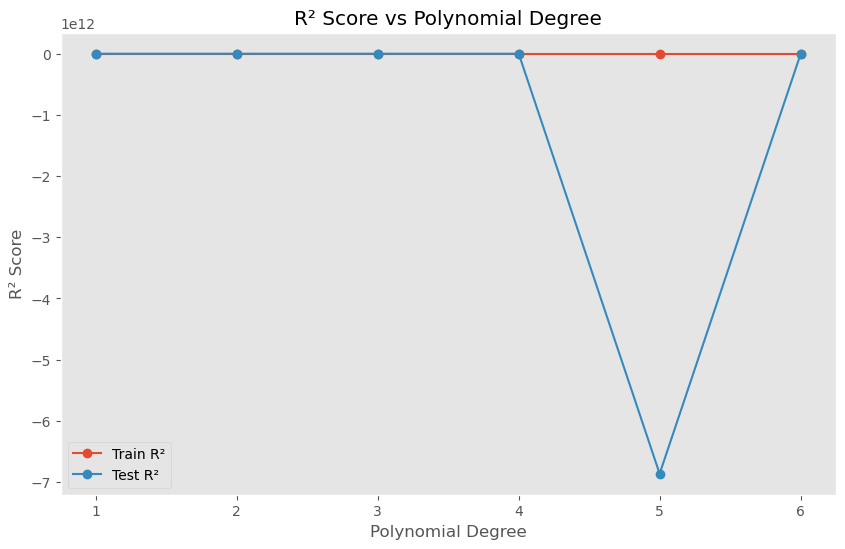

In [10]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Initialize lists to store R² scores
train_r2_scores = []
test_r2_scores = []
degrees = range(1, 7)

# Loop through degrees 1 to 6
for degree in degrees:
    # Create polynomial features
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    
    # Train the model
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    
    # Predict on training and test sets
    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)
    
    # Calculate R² scores
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    
    # Append scores to the lists
    train_r2_scores.append(r2_train)
    test_r2_scores.append(r2_test)

# Print R² scores for each degree
for degree, r2_train, r2_test in zip(degrees, train_r2_scores, test_r2_scores):
    print(f"Degree {degree}: R² train = {r2_train:.3f}, R² test = {r2_test:.3f}")

# Plot the R² scores
plt.figure(figsize=(10, 6))
plt.plot(degrees, train_r2_scores, label='Train R²', marker='o')
plt.plot(degrees, test_r2_scores, label='Test R²', marker='o')
plt.xlabel('Polynomial Degree')
plt.ylabel('R² Score')
plt.title('R² Score vs Polynomial Degree')
plt.legend()
plt.grid()
plt.show()


## Ridge regression

Alpha 0.1: R² train = 0.679, R² test = 0.177
Alpha 0.2: R² train = 0.677, R² test = 0.182
Alpha 0.3: R² train = 0.675, R² test = 0.188
Alpha 0.4: R² train = 0.673, R² test = 0.192
Alpha 0.5: R² train = 0.672, R² test = 0.197
Alpha 0.6: R² train = 0.670, R² test = 0.200
Alpha 0.7: R² train = 0.669, R² test = 0.203
Alpha 0.8: R² train = 0.668, R² test = 0.205
Alpha 0.9: R² train = 0.667, R² test = 0.207
Alpha 1.0: R² train = 0.666, R² test = 0.209


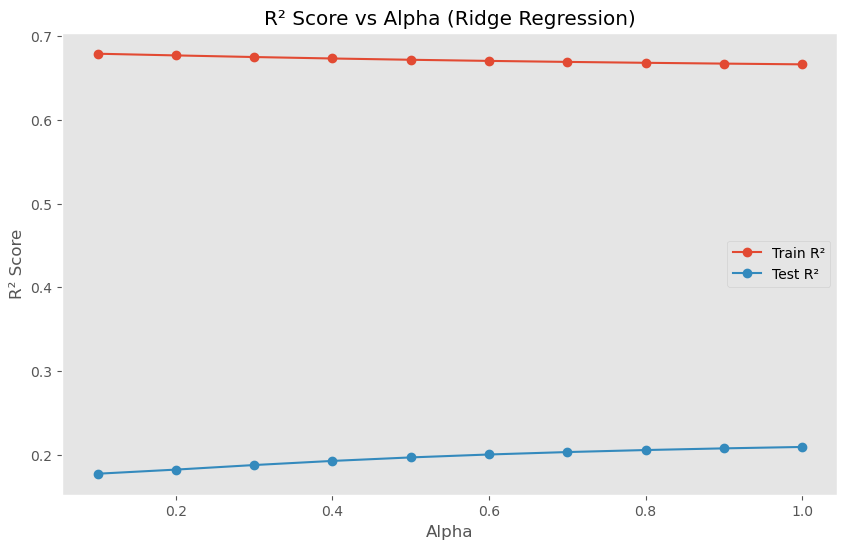

In [11]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Initialize lists to store R² scores
train_r2_scores = []
test_r2_scores = []
alphas = np.arange(0.1, 1.1, 0.1)

# Loop through alpha values
for alpha in alphas:
    # Train Ridge Regression model
    model = Ridge(alpha=alpha)
    model.fit(X_train, y_train)
    
    # Predict on training and test sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculate R² scores
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    
    # Append scores to the lists
    train_r2_scores.append(r2_train)
    test_r2_scores.append(r2_test)

# Print R² scores for each alpha
for alpha, r2_train, r2_test in zip(alphas, train_r2_scores, test_r2_scores):
    print(f"Alpha {alpha:.1f}: R² train = {r2_train:.3f}, R² test = {r2_test:.3f}")

# Plot the R² scores
plt.figure(figsize=(10, 6))
plt.plot(alphas, train_r2_scores, label='Train R²', marker='o')
plt.plot(alphas, test_r2_scores, label='Test R²', marker='o')
plt.xlabel('Alpha')
plt.ylabel('R² Score')
plt.title('R² Score vs Alpha (Ridge Regression)')
plt.legend()
plt.grid()
plt.show()


## Lasso regression

Alpha 0.1: R² train = 0.612, R² test = 0.151
Alpha 0.2: R² train = 0.605, R² test = 0.188
Alpha 0.3: R² train = 0.593, R² test = 0.206
Alpha 0.4: R² train = 0.577, R² test = 0.207
Alpha 0.5: R² train = 0.558, R² test = 0.193
Alpha 0.6: R² train = 0.553, R² test = 0.188
Alpha 0.7: R² train = 0.553, R² test = 0.189
Alpha 0.8: R² train = 0.553, R² test = 0.189
Alpha 0.9: R² train = 0.552, R² test = 0.189
Alpha 1.0: R² train = 0.552, R² test = 0.190


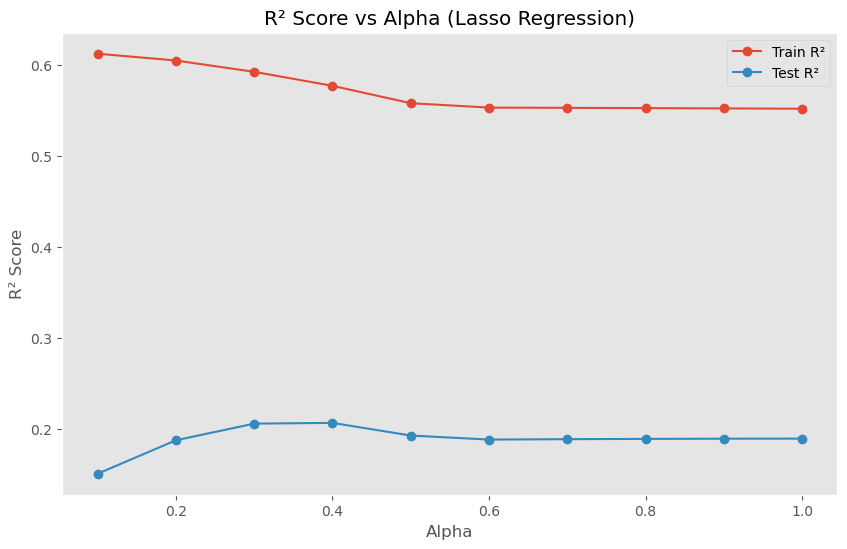

In [12]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Initialize lists to store R² scores
train_r2_scores = []
test_r2_scores = []
alphas = np.arange(0.1, 1.1, 0.1)

# Loop through alpha values
for alpha in alphas:
    # Train Lasso Regression model
    model = Lasso(alpha=alpha, max_iter=10000)  # Increased max_iter to ensure convergence
    model.fit(X_train, y_train)
    
    # Predict on training and test sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculate R² scores
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    
    # Append scores to the lists
    train_r2_scores.append(r2_train)
    test_r2_scores.append(r2_test)

# Print R² scores for each alpha
for alpha, r2_train, r2_test in zip(alphas, train_r2_scores, test_r2_scores):
    print(f"Alpha {alpha:.1f}: R² train = {r2_train:.3f}, R² test = {r2_test:.3f}")

# Plot the R² scores
plt.figure(figsize=(10, 6))
plt.plot(alphas, train_r2_scores, label='Train R²', marker='o')
plt.plot(alphas, test_r2_scores, label='Test R²', marker='o')
plt.xlabel('Alpha')
plt.ylabel('R² Score')
plt.title('R² Score vs Alpha (Lasso Regression)')
plt.legend()
plt.grid()
plt.show()


## Elsaticnet regression

In [16]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Initialize lists to store results
results = []

# Alpha and l1_ratio ranges
alphas = np.arange(0.1, 1.1, 0.1)
l1_ratios = np.arange(0.1, 1.1, 0.1)

# Loop through alpha and l1_ratio values
for alpha in alphas:
    for l1_ratio in l1_ratios:
        # Train ElasticNet Regression model
        model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, max_iter=10000)
        model.fit(X_train, y_train)
        
        # Predict on training and test sets
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        
        # Calculate R² scores
        r2_train = r2_score(y_train, y_train_pred)
        r2_test = r2_score(y_test, y_test_pred)
        
        # Append results
        results.append({'alpha': alpha, 'l1_ratio': l1_ratio, 'r2_train': r2_train, 'r2_test': r2_test})

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Print the results
print(results_df)

# Find the row with the maximum R² score for training
max_train_r2 = results_df.loc[results_df['r2_train'].idxmax()]
print("Maximum Train R²:")
print(max_train_r2)

# Find the row with the maximum R² score for testing
max_test_r2 = results_df.loc[results_df['r2_test'].idxmax()]
print("\nMaximum Test R²:")
print(max_test_r2)

    alpha  l1_ratio  r2_train   r2_test
0     0.1       0.1  0.638148  0.194274
1     0.1       0.2  0.632734  0.184313
2     0.1       0.3  0.626865  0.173431
3     0.1       0.4  0.621188  0.158119
4     0.1       0.5  0.616712  0.143225
5     0.1       0.6  0.613819  0.137066
6     0.1       0.7  0.613400  0.140305
7     0.1       0.8  0.613106  0.143911
8     0.1       0.9  0.612781  0.147459
9     0.1       1.0  0.612424  0.150946
10    0.2       0.1  0.627650  0.175656
11    0.2       0.2  0.618880  0.159593
12    0.2       0.3  0.613212  0.148563
13    0.2       0.4  0.611926  0.154939
14    0.2       0.5  0.611105  0.161103
15    0.2       0.6  0.610159  0.167015
16    0.2       0.7  0.609081  0.172653
17    0.2       0.8  0.607862  0.177992
18    0.2       0.9  0.606493  0.183008
19    0.2       1.0  0.604964  0.187673
20    0.3       0.1  0.620168  0.167574
21    0.3       0.2  0.612478  0.155921
22    0.3       0.3  0.610324  0.165726
23    0.3       0.4  0.608642  0.174408


## Support Vector Regression (SVR)

In [18]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize lists to store results
results = []

# Range of C and epsilon values
C_values = np.arange(1, 7, 1)
epsilon_values = np.arange(0.1, 1.2, 0.1)

# Loop through C and epsilon values
for C in C_values:
    for epsilon in epsilon_values:
        # Train SVR model
        model = SVR(C=C, epsilon=epsilon)
        model.fit(X_train, y_train)  # Flatten y for SVR compatibility
        
        # Predict on training and test sets
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        
        # Calculate R² scores
        r2_train = r2_score(y_train, y_train_pred)
        r2_test = r2_score(y_test, y_test_pred)
        
        # Append results
        results.append({'C': C, 'epsilon': epsilon, 'r2_train': r2_train, 'r2_test': r2_test})

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Print the results
print(results_df)

# Find the best combination for training and testing
max_train_r2 = results_df.loc[results_df['r2_train'].idxmax()]
max_test_r2 = results_df.loc[results_df['r2_test'].idxmax()]

print("\nMaximum Train R²:")
print(max_train_r2)

print("\nMaximum Test R²:")
print(max_test_r2)

# Visualize R² scores as heatmaps
# Pivot data for heatmaps
train_heatmap = results_df.pivot("C", "epsilon", "r2_train")
test_heatmap = results_df.pivot("C", "epsilon", "r2_test")

# Plot train heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(train_heatmap, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Train R² Heatmap")
plt.xlabel("Epsilon")
plt.ylabel("C")
plt.show()

# Plot test heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(test_heatmap, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Test R² Heatmap")
plt.xlabel("Epsilon")
plt.ylabel("C")
plt.show()


C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

    C  epsilon  r2_train   r2_test
0   1      0.1 -0.099158 -0.075577
1   1      0.2 -0.077072 -0.044834
2   1      0.3 -0.048635 -0.013645
3   1      0.4 -0.030299  0.000551
4   1      0.5 -0.010476  0.016364
5   1      0.6  0.005614  0.018025
6   1      0.7  0.017294  0.007968
7   1      0.8  0.024041 -0.009323
8   1      0.9  0.024753 -0.039111
9   1      1.0  0.018660 -0.084332
10  1      1.1  0.008660 -0.141387
11  2      0.1 -0.076795 -0.058906
12  2      0.2 -0.054359 -0.026748
13  2      0.3 -0.027167 -0.003773
14  2      0.4 -0.002237  0.018708
15  2      0.5  0.013825  0.029208
16  2      0.6  0.025638  0.026166
17  2      0.7  0.036444  0.013889
18  2      0.8  0.042567 -0.005299
19  2      0.9  0.039893 -0.039725
20  2      1.0  0.032226 -0.083235
21  2      1.1  0.022048 -0.140720
22  3      0.1 -0.066176 -0.060704
23  3      0.2 -0.040989 -0.022018
24  3      0.3 -0.009084  0.009222
25  3      0.4  0.010744  0.026690
26  3      0.5  0.030510  0.039187
27  3      0.6  0.04

TypeError: DataFrame.pivot() takes 1 positional argument but 4 were given

## Decision tree regression

In [20]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Initialize the Decision Tree Regressor
model = DecisionTreeRegressor()

# Train the model
model.fit(X_train, y_train)

# Predict on training and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate R² scores
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Print the R² scores
print(f"R² score for training set: {r2_train:.3f}")
print(f"R² score for test set: {r2_test:.3f}")

R² score for training set: 0.847
R² score for test set: 0.377


## Random forest regression

In [39]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Initialize lists to store results
results = []

# Range of n_estimators
n_estimators_range = range(100, 401, 10)

y_train = y_train.values
y_test = y_test.values

# Loop through n_estimators values
for n_estimators in n_estimators_range:
    # Train Random Forest Regressor
    model = RandomForestRegressor(n_estimators=n_estimators, random_state=42)
    model.fit(X_train, y_train.ravel())  # Flatten y for compatibility
    
    # Predict on training and test sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculate R² scores
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    
    # Append results
    results.append({'n_estimators': n_estimators, 'r2_train': r2_train, 'r2_test': r2_test})

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Print the results
print("Top 10 configurations by Test R²:")
print(results_df.sort_values(by='r2_test', ascending=False).head(10))


Top 10 configurations by Test R²:
    n_estimators  r2_train   r2_test
25           350  0.840418  0.444602
26           360  0.840314  0.442252
24           340  0.840372  0.440142
27           370  0.840374  0.438959
1            110  0.839977  0.438187
28           380  0.840225  0.437445
21           310  0.840314  0.436502
18           280  0.840604  0.436096
23           330  0.840324  0.435728
20           300  0.840493  0.435047


## Gradient bossting regression

In [40]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Initialize lists to store results
results = []

# Hyperparameter ranges
n_estimators_range = range(100, 311, 10)
learning_rate_range = np.arange(0.1, 1.1, 0.1)
max_depth_range = range(1, 16)

# Perform grid search over hyperparameters
for n_estimators in n_estimators_range:
    for learning_rate in learning_rate_range:
        for max_depth in max_depth_range:
            # Train Gradient Boosting Regressor
            model = GradientBoostingRegressor(
                n_estimators=n_estimators,
                learning_rate=learning_rate,
                max_depth=max_depth
            )
            model.fit(X_train, y_train.ravel())  # Flatten y for compatibility
            
            # Predict on training and test sets
            y_train_pred = model.predict(X_train)
            y_test_pred = model.predict(X_test)
            
            # Calculate R² scores
            r2_train = r2_score(y_train, y_train_pred)
            r2_test = r2_score(y_test, y_test_pred)
            
            # Append results
            results.append({
                'n_estimators': n_estimators,
                'learning_rate': learning_rate,
                'max_depth': max_depth,
                'r2_train': r2_train,
                'r2_test': r2_test
            })

# Print the top results sorted by test R²
print("Top 10 configurations by Test R²:")
print(results_df.sort_values(by='r2_test', ascending=False).head(10))


Top 10 configurations by Test R²:
    n_estimators  r2_train   r2_test
25           350  0.840418  0.444602
26           360  0.840314  0.442252
24           340  0.840372  0.440142
27           370  0.840374  0.438959
1            110  0.839977  0.438187
28           380  0.840225  0.437445
21           310  0.840314  0.436502
18           280  0.840604  0.436096
23           330  0.840324  0.435728
20           300  0.840493  0.435047


C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


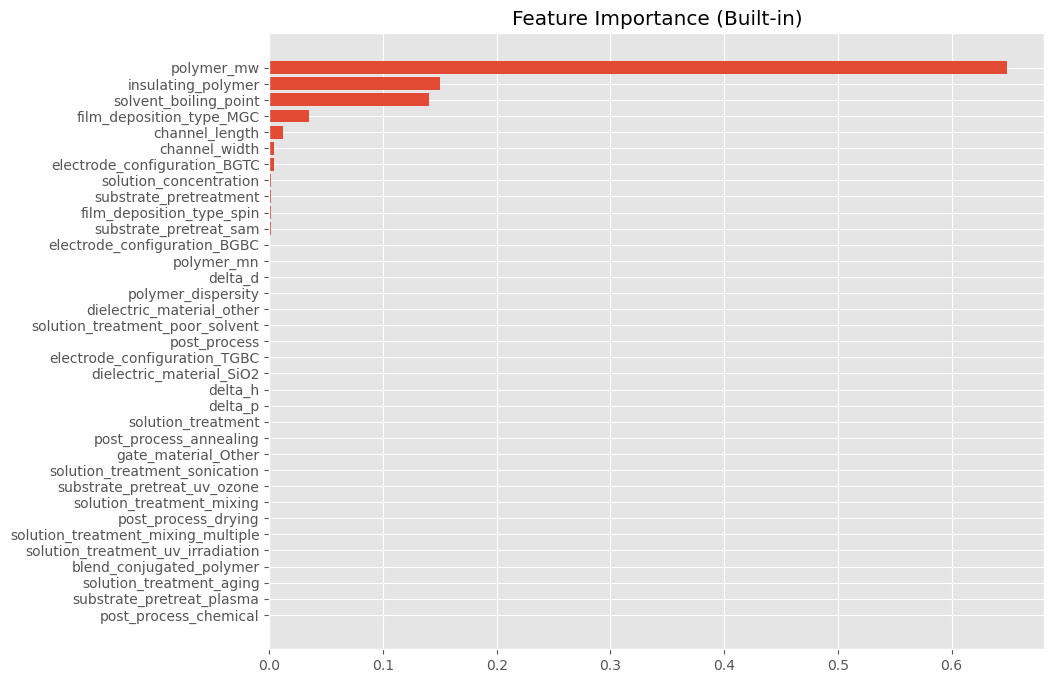

Feature: post_process_chemical, Importance: 0.0
Feature: substrate_pretreat_plasma, Importance: 0.0
Feature: solution_treatment_aging, Importance: 0.0
Feature: blend_conjugated_polymer, Importance: 0.0
Feature: solution_treatment_uv_irradiation, Importance: 0.0
Feature: solution_treatment_mixing_multiple, Importance: 0.0
Feature: post_process_drying, Importance: 0.0
Feature: solution_treatment_mixing, Importance: 0.0
Feature: substrate_pretreat_uv_ozone, Importance: 0.0
Feature: solution_treatment_sonication, Importance: 0.0
Feature: gate_material_Other, Importance: 2.9711973327170317e-19
Feature: post_process_annealing, Importance: 7.356547214009688e-08
Feature: solution_treatment, Importance: 1.560210162521531e-07
Feature: delta_p, Importance: 3.365513877488152e-07
Feature: delta_h, Importance: 8.526121304700842e-07
Feature: dielectric_material_SiO2, Importance: 2.2182448131121053e-06
Feature: electrode_configuration_TGBC, Importance: 4.005597551139224e-06
Feature: post_process, Impo

In [7]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

fixed_learning_rate = 0.8
fixed_n_estimators = 210
max_depth = 10

model = GradientBoostingRegressor(n_estimators=fixed_n_estimators, learning_rate=fixed_learning_rate, max_depth=max_depth, random_state=42)

model.fit(X_train, Y_train)

feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)
plt.figure(figsize=(10,8))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_train.columns)[sorted_idx])
plt.title('Feature Importance (Built-in)')
plt.show()

sorted_idx = np.argsort(feature_importance)
sorted_feature_names = np.array(X_train.columns)[sorted_idx]
sorted_feature_importances = feature_importance[sorted_idx]

for feature, importance in zip(sorted_feature_names, sorted_feature_importances):
    print(f"Feature: {feature}, Importance: {importance}")

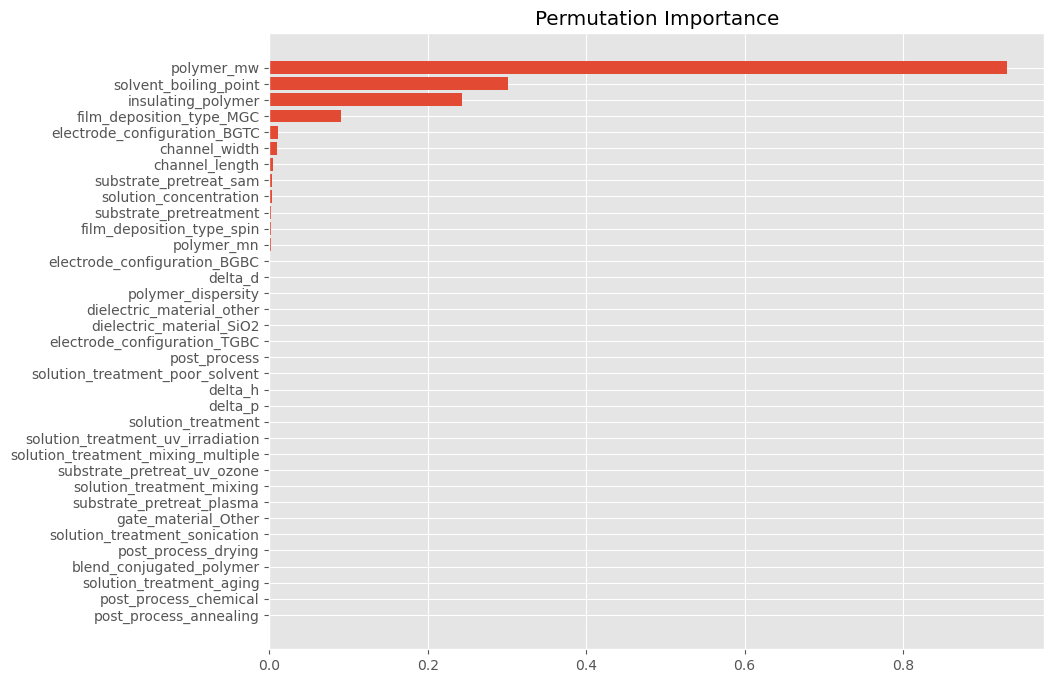

In [39]:
result = permutation_importance(model, X_train, Y_train, n_repeats=10)
sorted_idx = result.importances_mean.argsort()
plt.figure(figsize=(10,8))
plt.barh(range(len(sorted_idx)), result.importances_mean[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_train.columns)[sorted_idx])
plt.title('Permutation Importance')
plt.show()

## K-nearest Neighbors Regression

In [41]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score

# Initialize lists to store results
results = []

# Range of n_neighbors
n_neighbors_range = range(1, 17)

# Loop through n_neighbors values
for n_neighbors in n_neighbors_range:
    # Train K-Nearest Neighbors Regressor
    model = KNeighborsRegressor(n_neighbors=n_neighbors)
    model.fit(X_train, y_train.ravel())  # Flatten y for compatibility
    
    # Predict on training and test sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculate R² scores
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    
    # Append results
    results.append({'n_neighbors': n_neighbors, 'r2_train': r2_train, 'r2_test': r2_test})

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Print the results
print("Top configurations by Test R²:")
print(results_df.sort_values(by='r2_test', ascending=False).head(10))


Top configurations by Test R²:
    n_neighbors  r2_train   r2_test
12           13  0.475839  0.328416
11           12  0.526005  0.316301
10           11  0.562662  0.301058
14           15  0.410780  0.291128
13           14  0.444165  0.290294
9            10  0.586484  0.289605
15           16  0.368694  0.272052
8             9  0.630303  0.243701
7             8  0.672682  0.157400
6             7  0.708729  0.023895


In [21]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
from sklearn.inspection import permutation_importance

# Train k-NN model
knn = KNeighborsRegressor(n_neighbors=9)
knn.fit(X_train, Y_train)

# Evaluate baseline performance
baseline_r2 = r2_score(Y_test, knn.predict(X_test))

# Compute permutation importance
perm_importance = permutation_importance(knn, X_test, Y_test, n_repeats=30, random_state=42)

# Display importance scores
importance_df = pd.DataFrame({
    'feature': DPP_DTT_X.columns,
    'importance': perm_importance.importances_mean
}).sort_values(by='importance', ascending=False)

print(importance_df)

                               feature    importance
7                        channel_width  8.237159e-01
1                           polymer_mw  1.612363e-01
22                  insulating_polymer  2.898555e-04
34               post_process_chemical  0.000000e+00
31   solution_treatment_uv_irradiation  0.000000e+00
30  solution_treatment_mixing_multiple  0.000000e+00
29           solution_treatment_mixing  0.000000e+00
28       solution_treatment_sonication  0.000000e+00
27            solution_treatment_aging  0.000000e+00
26     solution_treatment_poor_solvent  0.000000e+00
25         substrate_pretreat_uv_ozone  0.000000e+00
24           substrate_pretreat_plasma  0.000000e+00
21            blend_conjugated_polymer  0.000000e+00
20                             delta_h  0.000000e+00
19                             delta_p  0.000000e+00
18                             delta_d  0.000000e+00
16           dielectric_material_other  0.000000e+00
33                 post_process_drying  0.0000

In [42]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from xgboost import XGBRegressor

# Initialize lists to store results
results = []

# Hyperparameter ranges
n_estimators_range = range(100, 311, 10)
learning_rate_range = np.arange(0.1, 1.1, 0.1)
max_depth_range = range(1, 17)

# Perform grid search over hyperparameters
for n_estimators in n_estimators_range:
    for learning_rate in learning_rate_range:
        for max_depth in max_depth_range:
            # Train XGBoost Regressor
            model = XGBRegressor(
                n_estimators=n_estimators,
                learning_rate=learning_rate,
                max_depth=max_depth,
                random_state=42
            )
            model.fit(X_train, y_train.ravel())  # Flatten y for compatibility
            
            # Predict on training and test sets
            y_train_pred = model.predict(X_train)
            y_test_pred = model.predict(X_test)
            
            # Calculate R² scores
            r2_train = r2_score(y_train, y_train_pred)
            r2_test = r2_score(y_test, y_test_pred)
            
            # Append results
            results.append({
                'n_estimators': n_estimators,
                'learning_rate': learning_rate,
                'max_depth': max_depth,
                'r2_train': r2_train,
                'r2_test': r2_test
            })

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Print the top 10 configurations sorted by test R²
print("Top 10 configurations by Test R²:")
print(results_df.sort_values(by='r2_test', ascending=False).head(10))


Top 10 configurations by Test R²:
      n_estimators  learning_rate  max_depth  r2_train   r2_test
706            140            0.5          3  0.846910  0.447590
3426           310            0.5          3  0.846911  0.447546
2626           260            0.5          3  0.846911  0.447546
2946           280            0.5          3  0.846911  0.447546
2786           270            0.5          3  0.846911  0.447546
3266           300            0.5          3  0.846911  0.447546
3106           290            0.5          3  0.846911  0.447546
2466           250            0.5          3  0.846911  0.447546
2306           240            0.5          3  0.846911  0.447546
2146           230            0.5          3  0.846911  0.447546


In [32]:
!pip install catboost

   ---------------------------------------- 0.0/101.7 MB ? eta -:--:--
   ---------------------------------------- 0.1/101.7 MB 1.6 MB/s eta 0:01:04
   ---------------------------------------- 0.5/101.7 MB 5.9 MB/s eta 0:00:18
   ---------------------------------------- 1.1/101.7 MB 9.1 MB/s eta 0:00:12
    --------------------------------------- 2.2/101.7 MB 12.7 MB/s eta 0:00:08
   - -------------------------------------- 3.7/101.7 MB 17.1 MB/s eta 0:00:06
   -- ------------------------------------- 6.1/101.7 MB 22.9 MB/s eta 0:00:05
   --- ------------------------------------ 9.7/101.7 MB 31.1 MB/s eta 0:00:03
   ----- ---------------------------------- 15.2/101.7 MB 93.0 MB/s eta 0:00:01
   ------- ------------------------------- 20.8/101.7 MB 108.8 MB/s eta 0:00:01
   ---------- ---------------------------- 26.4/101.7 MB 110.0 MB/s eta 0:00:01
   ------------ -------------------------- 31.9/101.7 MB 110.0 MB/s eta 0:00:01
   -------------- ------------------------ 37.1/101.7 MB 10

In [43]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from catboost import CatBoostRegressor

# Initialize lists to store results
results = []

# Hyperparameter ranges
iterations_range = range(100, 311, 10)
learning_rate_range = np.arange(0.1, 1.1, 0.1)
depth_range = range(1, 17)

# Perform grid search over hyperparameters
for iterations in iterations_range:
    for learning_rate in learning_rate_range:
        for depth in depth_range:
            # Train CatBoost Regressor
            model = CatBoostRegressor(
                iterations=iterations,
                learning_rate=learning_rate,
                depth=depth,
                verbose=0,  # Suppress CatBoost output
                random_seed=42
            )
            model.fit(X_train, y_train.ravel())  # Flatten y for compatibility
            
            # Predict on training and test sets
            y_train_pred = model.predict(X_train)
            y_test_pred = model.predict(X_test)
            
            # Calculate R² scores
            r2_train = r2_score(y_train, y_train_pred)
            r2_test = r2_score(y_test, y_test_pred)
            
            # Append results
            results.append({
                'iterations': iterations,
                'learning_rate': learning_rate,
                'depth': depth,
                'r2_train': r2_train,
                'r2_test': r2_test
            })

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Print the top 10 configurations sorted by test R²
print("Top 10 configurations by Test R²:")
print(results_df.sort_values(by='r2_test', ascending=False).head(10))


Top 10 configurations by Test R²:
      iterations  learning_rate  depth  r2_train   r2_test
74           100            0.5     11  0.846915  0.525470
234          110            0.5     11  0.846915  0.525372
394          120            0.5     11  0.846915  0.525355
554          130            0.5     11  0.846916  0.525339
714          140            0.5     11  0.846916  0.525321
1034         160            0.5     11  0.846916  0.525312
874          150            0.5     11  0.846916  0.525309
1194         170            0.5     11  0.846916  0.525306
1514         190            0.5     11  0.846916  0.525305
1674         200            0.5     11  0.846916  0.525304


In [45]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Initialize lists to store results
results = []

# Hyperparameter ranges
n_estimators_range = range(100, 311, 10)
learning_rate_range = np.arange(0.1, 1.1, 0.1)
max_depth_range = range(1, 17)

# Perform grid search over hyperparameters
for n_estimators in n_estimators_range:
    for learning_rate in learning_rate_range:
        for max_depth in max_depth_range:
            # Define the AdaBoost model with a DecisionTreeRegressor as the base learner
            model = AdaBoostRegressor(
                n_estimators=n_estimators,
                learning_rate=learning_rate,
                random_state=42
            )
            
            # Train the model
            model.fit(X_train, y_train.ravel())
            
            # Predict on training and test sets
            y_train_pred = model.predict(X_train)
            y_test_pred = model.predict(X_test)
            
            # Calculate R² scores
            r2_train = r2_score(y_train, y_train_pred)
            r2_test = r2_score(y_test, y_test_pred)
            
            # Append results
            results.append({
                'n_estimators': n_estimators,
                'learning_rate': learning_rate,
                'max_depth': max_depth,
                'r2_train': r2_train,
                'r2_test': r2_test
            })

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Print the top 10 configurations sorted by test R²
print("Top 10 configurations by Test R²:")
print(results_df.sort_values(by='r2_test', ascending=False).head(10))


Top 10 configurations by Test R²:
      n_estimators  learning_rate  max_depth  r2_train   r2_test
0              100            0.1          1  0.826773  0.656678
321            120            0.1          2  0.826773  0.656678
1287           180            0.1          8  0.826773  0.656678
1288           180            0.1          9  0.826773  0.656678
1289           180            0.1         10  0.826773  0.656678
1290           180            0.1         11  0.826773  0.656678
1291           180            0.1         12  0.826773  0.656678
1292           180            0.1         13  0.826773  0.656678
1293           180            0.1         14  0.826773  0.656678
1294           180            0.1         15  0.826773  0.656678


## Neural network regression

C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1624: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1624: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1624: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1624: DataC

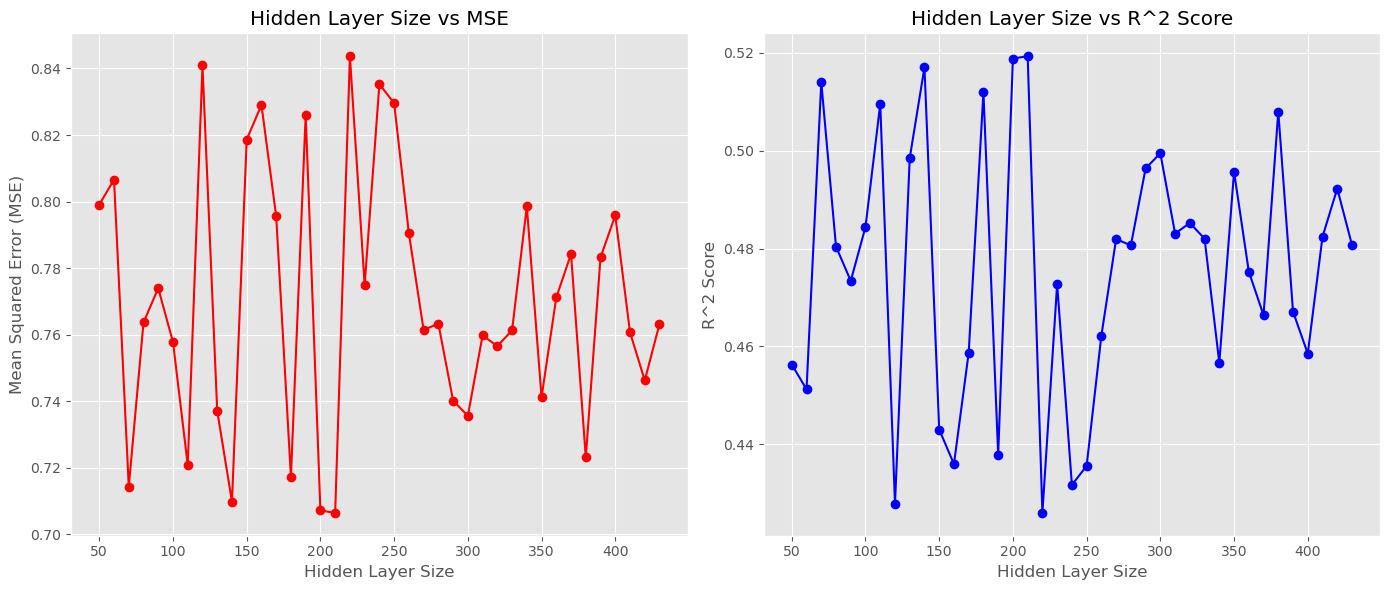

[0.4563141348491596, 0.4512385718898606, 0.514026941821037, 0.48041994028008883, 0.47340875673610094, 0.48444537487605466, 0.5095554880518873, 0.4278810328150038, 0.49849533037040306, 0.5170664953926447, 0.44302302894416, 0.4359583584057556, 0.458715247101559, 0.512019635492127, 0.43791165126992415, 0.5188474833489467, 0.5193438550653573, 0.42598358512374324, 0.47276298590799104, 0.43169136841252065, 0.4355932130664284, 0.4622165032711264, 0.48194562034611954, 0.48066657197926965, 0.4963967184821759, 0.4995051195227279, 0.4830822544066412, 0.4852486434092461, 0.48203696729494205, 0.4566716744367336, 0.495712481359024, 0.47531175722914487, 0.4664073783313669, 0.508000321501453, 0.4671210387956226, 0.4585484146719736, 0.4824162648842527, 0.4922770310449036, 0.4807545913738773]


In [22]:
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

hidden_layer_sizes_range = range(50, 440, 10)

mse_scores = []
r2_scores = []

for size in hidden_layer_sizes_range:
    mlp_regressor = MLPRegressor(hidden_layer_sizes=(size,), activation='relu', solver='adam', max_iter=1000, random_state=42)
    mlp_regressor.fit(X_train_scaled, Y_train)
    Y_pred = mlp_regressor.predict(X_test_scaled)
    mse_scores.append(mean_squared_error(Y_test, Y_pred))
    r2_scores.append(r2_score(Y_test, Y_pred))

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(hidden_layer_sizes_range, mse_scores, marker='o', linestyle='-', color='red')
plt.title('Hidden Layer Size vs MSE')
plt.xlabel('Hidden Layer Size')
plt.ylabel('Mean Squared Error (MSE)')

plt.subplot(1, 2, 2)
plt.plot(hidden_layer_sizes_range, r2_scores, marker='o', linestyle='-', color='blue')
plt.title('Hidden Layer Size vs R^2 Score')
plt.xlabel('Hidden Layer Size')
plt.ylabel('R^2 Score')

plt.tight_layout()
plt.show()
print(r2_scores)

In [6]:
from tpot import TPOTRegressor
tpot = TPOTRegressor(generations=5, population_size=50, verbosity=3, scoring='r2', random_state=42)
#meaning of parameters = #http://epistasislab.github.io/tpot/api/

tpot.fit(X_train, Y_train)
50
print('training r2 is : ', tpot.score(X_train, Y_train))
print('testing r2 is : ',tpot.score(X_test, Y_test))

tpot.export('tpot_DPP_DTT_pipeline_combined_MYL_1.py')

C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\tpot\builtins\__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


30 operators have been imported by TPOT.


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]

  File "C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 217, in _count_physical_cores
    raise ValueError(


_pre_test decorator: _random_mutation_operator: num_test=0 The 'loss' parameter of GradientBoostingRegressor must be a str among {'huber', 'absolute_error', 'quantile', 'squared_error'}. Got 'lad' instead..
Pipeline encountered that has previously been evaluated during the optimization process. Using the score from the previous evaluation.
Pipeline encountered that has previously been evaluated during the optimization process. Using the score from the previous evaluation.

Generation 1 - Current Pareto front scores:

-1	0.7769413159434508	GradientBoostingRegressor(input_matrix, GradientBoostingRegressor__alpha=0.95, GradientBoostingRegressor__learning_rate=1.0, GradientBoostingRegressor__loss=huber, GradientBoostingRegressor__max_depth=10, GradientBoostingRegressor__max_features=0.5, GradientBoostingRegressor__min_samples_leaf=17, GradientBoostingRegressor__min_samples_split=6, GradientBoostingRegressor__n_estimators=100, GradientBoostingRegressor__subsample=0.9000000000000001)

-2	0.7

C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [7]:
from tpot import TPOTRegressor
tpot = TPOTRegressor(generations=10, population_size=50, verbosity=3, scoring='r2', random_state=42)
#meaning of parameters = #http://epistasislab.github.io/tpot/api/

tpot.fit(X_train, Y_train)
50
print('training r2 is : ', tpot.score(X_train, Y_train))
print('testing r2 is : ',tpot.score(X_test, Y_test))

tpot.export('tpot_DPP_DTT_pipeline_combined_MYL_2.py')

C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


30 operators have been imported by TPOT.


Optimization Progress:   0%|          | 0/550 [00:00<?, ?pipeline/s]

_pre_test decorator: _random_mutation_operator: num_test=0 The 'loss' parameter of GradientBoostingRegressor must be a str among {'huber', 'absolute_error', 'quantile', 'squared_error'}. Got 'lad' instead..
Pipeline encountered that has previously been evaluated during the optimization process. Using the score from the previous evaluation.
Pipeline encountered that has previously been evaluated during the optimization process. Using the score from the previous evaluation.

Generation 1 - Current Pareto front scores:

-1	0.7769413159434508	GradientBoostingRegressor(input_matrix, GradientBoostingRegressor__alpha=0.95, GradientBoostingRegressor__learning_rate=1.0, GradientBoostingRegressor__loss=huber, GradientBoostingRegressor__max_depth=10, GradientBoostingRegressor__max_features=0.5, GradientBoostingRegressor__min_samples_leaf=17, GradientBoostingRegressor__min_samples_split=6, GradientBoostingRegressor__n_estimators=100, GradientBoostingRegressor__subsample=0.9000000000000001)

-2	0.7

C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [8]:
from tpot import TPOTRegressor
tpot = TPOTRegressor(generations=50, population_size=50, verbosity=3, scoring='r2', random_state=42)
#meaning of parameters = #http://epistasislab.github.io/tpot/api/

tpot.fit(X_train, Y_train)
50
print('training r2 is : ', tpot.score(X_train, Y_train))
print('testing r2 is : ',tpot.score(X_test, Y_test))

tpot.export('tpot_DPP_DTT_pipeline_combined_MYL_3.py')

C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


30 operators have been imported by TPOT.


Optimization Progress:   0%|          | 0/2550 [00:00<?, ?pipeline/s]

_pre_test decorator: _random_mutation_operator: num_test=0 The 'loss' parameter of GradientBoostingRegressor must be a str among {'huber', 'absolute_error', 'quantile', 'squared_error'}. Got 'lad' instead..
Pipeline encountered that has previously been evaluated during the optimization process. Using the score from the previous evaluation.
Pipeline encountered that has previously been evaluated during the optimization process. Using the score from the previous evaluation.

Generation 1 - Current Pareto front scores:

-1	0.7769413159434508	GradientBoostingRegressor(input_matrix, GradientBoostingRegressor__alpha=0.95, GradientBoostingRegressor__learning_rate=1.0, GradientBoostingRegressor__loss=huber, GradientBoostingRegressor__max_depth=10, GradientBoostingRegressor__max_features=0.5, GradientBoostingRegressor__min_samples_leaf=17, GradientBoostingRegressor__min_samples_split=6, GradientBoostingRegressor__n_estimators=100, GradientBoostingRegressor__subsample=0.9000000000000001)

-2	0.7

C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [9]:
from tpot import TPOTRegressor
tpot = TPOTRegressor(generations=100, population_size=50, verbosity=3, scoring='r2', random_state=42)
#meaning of parameters = #http://epistasislab.github.io/tpot/api/

tpot.fit(X_train, Y_train)
50
print('training r2 is : ', tpot.score(X_train, Y_train))
print('testing r2 is : ',tpot.score(X_test, Y_test))

tpot.export('tpot_DPP_DTT_pipeline_combined_MYL_4.py')

C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


30 operators have been imported by TPOT.


Optimization Progress:   0%|          | 0/5050 [00:00<?, ?pipeline/s]

_pre_test decorator: _random_mutation_operator: num_test=0 The 'loss' parameter of GradientBoostingRegressor must be a str among {'huber', 'absolute_error', 'quantile', 'squared_error'}. Got 'lad' instead..
Pipeline encountered that has previously been evaluated during the optimization process. Using the score from the previous evaluation.
Pipeline encountered that has previously been evaluated during the optimization process. Using the score from the previous evaluation.

Generation 1 - Current Pareto front scores:

-1	0.7769413159434508	GradientBoostingRegressor(input_matrix, GradientBoostingRegressor__alpha=0.95, GradientBoostingRegressor__learning_rate=1.0, GradientBoostingRegressor__loss=huber, GradientBoostingRegressor__max_depth=10, GradientBoostingRegressor__max_features=0.5, GradientBoostingRegressor__min_samples_leaf=17, GradientBoostingRegressor__min_samples_split=6, GradientBoostingRegressor__n_estimators=100, GradientBoostingRegressor__subsample=0.9000000000000001)

-2	0.7

C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [10]:
from tpot import TPOTRegressor
tpot = TPOTRegressor(generations=5, population_size=100, verbosity=3, scoring='r2', random_state=42)
#meaning of parameters = #http://epistasislab.github.io/tpot/api/

tpot.fit(X_train, Y_train)
50
print('training r2 is : ', tpot.score(X_train, Y_train))
print('testing r2 is : ',tpot.score(X_test, Y_test))

tpot.export('tpot_DPP_DTT_pipeline_combined_MYL_5.py')

30 operators have been imported by TPOT.


C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Optimization Progress:   0%|          | 0/600 [00:00<?, ?pipeline/s]

_pre_test decorator: _random_mutation_operator: num_test=0 LassoLarsCV.__init__() got an unexpected keyword argument 'normalize'.
_pre_test decorator: _random_mutation_operator: num_test=0 LassoLarsCV.__init__() got an unexpected keyword argument 'normalize'.
_pre_test decorator: _random_mutation_operator: num_test=0 LassoLarsCV.__init__() got an unexpected keyword argument 'normalize'.
_pre_test decorator: _random_mutation_operator: num_test=0 Unsupported set of arguments: The combination of penalty='l2' and loss='epsilon_insensitive' are not supported when dual=False, Parameters: penalty='l2', loss='epsilon_insensitive', dual=False.
_pre_test decorator: _random_mutation_operator: num_test=1 LassoLarsCV.__init__() got an unexpected keyword argument 'normalize'.
_pre_test decorator: _random_mutation_operator: num_test=0 (slice(None, None, None), 0).
Pipeline encountered that has previously been evaluated during the optimization process. Using the score from the previous evaluation.

Ge

C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [11]:
from tpot import TPOTRegressor
tpot = TPOTRegressor(generations=10, population_size=100, verbosity=3, scoring='r2', random_state=42)
#meaning of parameters = #http://epistasislab.github.io/tpot/api/

tpot.fit(X_train, Y_train)
50
print('training r2 is : ', tpot.score(X_train, Y_train))
print('testing r2 is : ',tpot.score(X_test, Y_test))

tpot.export('tpot_DPP_DTT_pipeline_combined_MYL_6.py')

30 operators have been imported by TPOT.


C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Optimization Progress:   0%|          | 0/1100 [00:00<?, ?pipeline/s]

_pre_test decorator: _random_mutation_operator: num_test=0 LassoLarsCV.__init__() got an unexpected keyword argument 'normalize'.
_pre_test decorator: _random_mutation_operator: num_test=0 LassoLarsCV.__init__() got an unexpected keyword argument 'normalize'.
_pre_test decorator: _random_mutation_operator: num_test=0 LassoLarsCV.__init__() got an unexpected keyword argument 'normalize'.
_pre_test decorator: _random_mutation_operator: num_test=0 Unsupported set of arguments: The combination of penalty='l2' and loss='epsilon_insensitive' are not supported when dual=False, Parameters: penalty='l2', loss='epsilon_insensitive', dual=False.
_pre_test decorator: _random_mutation_operator: num_test=1 LassoLarsCV.__init__() got an unexpected keyword argument 'normalize'.
_pre_test decorator: _random_mutation_operator: num_test=0 (slice(None, None, None), 0).
Pipeline encountered that has previously been evaluated during the optimization process. Using the score from the previous evaluation.

Ge

C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [12]:
from tpot import TPOTRegressor
tpot = TPOTRegressor(generations=50, population_size=100, verbosity=3, scoring='r2', random_state=42)
#meaning of parameters = #http://epistasislab.github.io/tpot/api/

tpot.fit(X_train, Y_train)
50
print('training r2 is : ', tpot.score(X_train, Y_train))
print('testing r2 is : ',tpot.score(X_test, Y_test))

tpot.export('tpot_DPP_DTT_pipeline_combined_MYL_7.py')

30 operators have been imported by TPOT.


C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Optimization Progress:   0%|          | 0/5100 [00:00<?, ?pipeline/s]

_pre_test decorator: _random_mutation_operator: num_test=0 LassoLarsCV.__init__() got an unexpected keyword argument 'normalize'.
_pre_test decorator: _random_mutation_operator: num_test=0 LassoLarsCV.__init__() got an unexpected keyword argument 'normalize'.
_pre_test decorator: _random_mutation_operator: num_test=0 LassoLarsCV.__init__() got an unexpected keyword argument 'normalize'.
_pre_test decorator: _random_mutation_operator: num_test=0 Unsupported set of arguments: The combination of penalty='l2' and loss='epsilon_insensitive' are not supported when dual=False, Parameters: penalty='l2', loss='epsilon_insensitive', dual=False.
_pre_test decorator: _random_mutation_operator: num_test=1 LassoLarsCV.__init__() got an unexpected keyword argument 'normalize'.
_pre_test decorator: _random_mutation_operator: num_test=0 (slice(None, None, None), 0).
Pipeline encountered that has previously been evaluated during the optimization process. Using the score from the previous evaluation.

Ge

C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [13]:
from tpot import TPOTRegressor
tpot = TPOTRegressor(generations=100, population_size=100, verbosity=3, scoring='r2', random_state=42)
#meaning of parameters = #http://epistasislab.github.io/tpot/api/

tpot.fit(X_train, Y_train)
50
print('training r2 is : ', tpot.score(X_train, Y_train))
print('testing r2 is : ',tpot.score(X_test, Y_test))

tpot.export('tpot_DPP_DTT_pipeline_combined_MYL_8.py')

30 operators have been imported by TPOT.


C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Optimization Progress:   0%|          | 0/10100 [00:00<?, ?pipeline/s]

_pre_test decorator: _random_mutation_operator: num_test=0 LassoLarsCV.__init__() got an unexpected keyword argument 'normalize'.
_pre_test decorator: _random_mutation_operator: num_test=0 LassoLarsCV.__init__() got an unexpected keyword argument 'normalize'.
_pre_test decorator: _random_mutation_operator: num_test=0 LassoLarsCV.__init__() got an unexpected keyword argument 'normalize'.
_pre_test decorator: _random_mutation_operator: num_test=0 Unsupported set of arguments: The combination of penalty='l2' and loss='epsilon_insensitive' are not supported when dual=False, Parameters: penalty='l2', loss='epsilon_insensitive', dual=False.
_pre_test decorator: _random_mutation_operator: num_test=1 LassoLarsCV.__init__() got an unexpected keyword argument 'normalize'.
_pre_test decorator: _random_mutation_operator: num_test=0 (slice(None, None, None), 0).
Pipeline encountered that has previously been evaluated during the optimization process. Using the score from the previous evaluation.

Ge

C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [14]:
from tpot import TPOTRegressor
tpot = TPOTRegressor(generations=5, population_size=200, verbosity=3, scoring='r2', random_state=42)
#meaning of parameters = #http://epistasislab.github.io/tpot/api/

tpot.fit(X_train, Y_train)
50
print('training r2 is : ', tpot.score(X_train, Y_train))
print('testing r2 is : ',tpot.score(X_test, Y_test))

tpot.export('tpot_DPP_DTT_pipeline_combined_MYL_9.py')

30 operators have been imported by TPOT.


C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Optimization Progress:   0%|          | 0/1200 [00:00<?, ?pipeline/s]

_pre_test decorator: _random_mutation_operator: num_test=0 Automatic alpha grid generation is not supported for l1_ratio=0. Please supply a grid by providing your estimator with the appropriate `alphas=` argument..
_pre_test decorator: _random_mutation_operator: num_test=0 Found array with 0 feature(s) (shape=(50, 0)) while a minimum of 1 is required by _RidgeGCV..
_pre_test decorator: _random_mutation_operator: num_test=0 LassoLarsCV.__init__() got an unexpected keyword argument 'normalize'.
_pre_test decorator: _random_mutation_operator: num_test=0 LassoLarsCV.__init__() got an unexpected keyword argument 'normalize'.
_pre_test decorator: _random_mutation_operator: num_test=0 LassoLarsCV.__init__() got an unexpected keyword argument 'normalize'.
_pre_test decorator: _random_mutation_operator: num_test=0 The 'loss' parameter of GradientBoostingRegressor must be a str among {'huber', 'absolute_error', 'quantile', 'squared_error'}. Got 'lad' instead..
_pre_test decorator: _random_mutati

C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [15]:
from tpot import TPOTRegressor
tpot = TPOTRegressor(generations=10, population_size=200, verbosity=3, scoring='r2', random_state=42)
#meaning of parameters = #http://epistasislab.github.io/tpot/api/

tpot.fit(X_train, Y_train)
50
print('training r2 is : ', tpot.score(X_train, Y_train))
print('testing r2 is : ',tpot.score(X_test, Y_test))

tpot.export('tpot_DPP_DTT_pipeline_combined_MYL_10.py')

30 operators have been imported by TPOT.


C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Optimization Progress:   0%|          | 0/2200 [00:00<?, ?pipeline/s]

_pre_test decorator: _random_mutation_operator: num_test=0 Automatic alpha grid generation is not supported for l1_ratio=0. Please supply a grid by providing your estimator with the appropriate `alphas=` argument..
_pre_test decorator: _random_mutation_operator: num_test=0 Found array with 0 feature(s) (shape=(50, 0)) while a minimum of 1 is required by _RidgeGCV..
_pre_test decorator: _random_mutation_operator: num_test=0 LassoLarsCV.__init__() got an unexpected keyword argument 'normalize'.
_pre_test decorator: _random_mutation_operator: num_test=0 LassoLarsCV.__init__() got an unexpected keyword argument 'normalize'.
_pre_test decorator: _random_mutation_operator: num_test=0 LassoLarsCV.__init__() got an unexpected keyword argument 'normalize'.
_pre_test decorator: _random_mutation_operator: num_test=0 The 'loss' parameter of GradientBoostingRegressor must be a str among {'huber', 'absolute_error', 'quantile', 'squared_error'}. Got 'lad' instead..
_pre_test decorator: _random_mutati

C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [16]:
from tpot import TPOTRegressor
tpot = TPOTRegressor(generations=50, population_size=200, verbosity=3, scoring='r2', random_state=42)
#meaning of parameters = #http://epistasislab.github.io/tpot/api/

tpot.fit(X_train, Y_train)
50
print('training r2 is : ', tpot.score(X_train, Y_train))
print('testing r2 is : ',tpot.score(X_test, Y_test))

tpot.export('tpot_DPP_DTT_pipeline_combined_MYL_11.py')

30 operators have been imported by TPOT.


C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Optimization Progress:   0%|          | 0/10200 [00:00<?, ?pipeline/s]

_pre_test decorator: _random_mutation_operator: num_test=0 Automatic alpha grid generation is not supported for l1_ratio=0. Please supply a grid by providing your estimator with the appropriate `alphas=` argument..
_pre_test decorator: _random_mutation_operator: num_test=0 Found array with 0 feature(s) (shape=(50, 0)) while a minimum of 1 is required by _RidgeGCV..
_pre_test decorator: _random_mutation_operator: num_test=0 LassoLarsCV.__init__() got an unexpected keyword argument 'normalize'.
_pre_test decorator: _random_mutation_operator: num_test=0 LassoLarsCV.__init__() got an unexpected keyword argument 'normalize'.
_pre_test decorator: _random_mutation_operator: num_test=0 LassoLarsCV.__init__() got an unexpected keyword argument 'normalize'.
_pre_test decorator: _random_mutation_operator: num_test=0 The 'loss' parameter of GradientBoostingRegressor must be a str among {'huber', 'absolute_error', 'quantile', 'squared_error'}. Got 'lad' instead..
_pre_test decorator: _random_mutati

C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [17]:
from tpot import TPOTRegressor
tpot = TPOTRegressor(generations=100, population_size=200, verbosity=3, scoring='r2', random_state=42)
#meaning of parameters = #http://epistasislab.github.io/tpot/api/

tpot.fit(X_train, Y_train)
50
print('training r2 is : ', tpot.score(X_train, Y_train))
print('testing r2 is : ',tpot.score(X_test, Y_test))

tpot.export('tpot_DPP_DTT_pipeline_combined_MYL_12.py')

30 operators have been imported by TPOT.


C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Optimization Progress:   0%|          | 0/20200 [00:00<?, ?pipeline/s]

_pre_test decorator: _random_mutation_operator: num_test=0 Automatic alpha grid generation is not supported for l1_ratio=0. Please supply a grid by providing your estimator with the appropriate `alphas=` argument..
_pre_test decorator: _random_mutation_operator: num_test=0 Found array with 0 feature(s) (shape=(50, 0)) while a minimum of 1 is required by _RidgeGCV..
_pre_test decorator: _random_mutation_operator: num_test=0 LassoLarsCV.__init__() got an unexpected keyword argument 'normalize'.
_pre_test decorator: _random_mutation_operator: num_test=0 LassoLarsCV.__init__() got an unexpected keyword argument 'normalize'.
_pre_test decorator: _random_mutation_operator: num_test=0 LassoLarsCV.__init__() got an unexpected keyword argument 'normalize'.
_pre_test decorator: _random_mutation_operator: num_test=0 The 'loss' parameter of GradientBoostingRegressor must be a str among {'huber', 'absolute_error', 'quantile', 'squared_error'}. Got 'lad' instead..
_pre_test decorator: _random_mutati

C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [18]:
from tpot import TPOTRegressor
tpot = TPOTRegressor(generations=5, population_size=400, verbosity=3, scoring='r2', random_state=42)
#meaning of parameters = #http://epistasislab.github.io/tpot/api/

tpot.fit(X_train, Y_train)
50
print('training r2 is : ', tpot.score(X_train, Y_train))
print('testing r2 is : ',tpot.score(X_test, Y_test))

tpot.export('tpot_DPP_DTT_pipeline_combined_MYL_13.py')

30 operators have been imported by TPOT.


C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Optimization Progress:   0%|          | 0/2400 [00:00<?, ?pipeline/s]

_pre_test decorator: _random_mutation_operator: num_test=0 The 'loss' parameter of SGDRegressor must be a str among {'epsilon_insensitive', 'huber', 'squared_epsilon_insensitive', 'squared_error'}. Got 'squared_loss' instead..
_pre_test decorator: _random_mutation_operator: num_test=0 The 'loss' parameter of GradientBoostingRegressor must be a str among {'huber', 'absolute_error', 'quantile', 'squared_error'}. Got 'ls' instead..
_pre_test decorator: _random_mutation_operator: num_test=1 Automatic alpha grid generation is not supported for l1_ratio=0. Please supply a grid by providing your estimator with the appropriate `alphas=` argument..
_pre_test decorator: _random_mutation_operator: num_test=0 The 'loss' parameter of GradientBoostingRegressor must be a str among {'huber', 'absolute_error', 'quantile', 'squared_error'}. Got 'lad' instead..
_pre_test decorator: _random_mutation_operator: num_test=0 The 'loss' parameter of SGDRegressor must be a str among {'epsilon_insensitive', 'hube

C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [19]:
from tpot import TPOTRegressor
tpot = TPOTRegressor(generations=10, population_size=400, verbosity=3, scoring='r2', random_state=42)
#meaning of parameters = #http://epistasislab.github.io/tpot/api/

tpot.fit(X_train, Y_train)
50
print('training r2 is : ', tpot.score(X_train, Y_train))
print('testing r2 is : ',tpot.score(X_test, Y_test))

tpot.export('tpot_DPP_DTT_pipeline_combined_MYL_14.py')

30 operators have been imported by TPOT.


C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Optimization Progress:   0%|          | 0/4400 [00:00<?, ?pipeline/s]

_pre_test decorator: _random_mutation_operator: num_test=0 The 'loss' parameter of SGDRegressor must be a str among {'epsilon_insensitive', 'huber', 'squared_epsilon_insensitive', 'squared_error'}. Got 'squared_loss' instead..
_pre_test decorator: _random_mutation_operator: num_test=0 The 'loss' parameter of GradientBoostingRegressor must be a str among {'huber', 'absolute_error', 'quantile', 'squared_error'}. Got 'ls' instead..
_pre_test decorator: _random_mutation_operator: num_test=1 Automatic alpha grid generation is not supported for l1_ratio=0. Please supply a grid by providing your estimator with the appropriate `alphas=` argument..
_pre_test decorator: _random_mutation_operator: num_test=0 The 'loss' parameter of GradientBoostingRegressor must be a str among {'huber', 'absolute_error', 'quantile', 'squared_error'}. Got 'lad' instead..
_pre_test decorator: _random_mutation_operator: num_test=0 The 'loss' parameter of SGDRegressor must be a str among {'epsilon_insensitive', 'hube

C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [20]:
from tpot import TPOTRegressor
tpot = TPOTRegressor(generations=50, population_size=400, verbosity=3, scoring='r2', random_state=42)
#meaning of parameters = #http://epistasislab.github.io/tpot/api/

tpot.fit(X_train, Y_train)
50
print('training r2 is : ', tpot.score(X_train, Y_train))
print('testing r2 is : ',tpot.score(X_test, Y_test))

tpot.export('tpot_DPP_DTT_pipeline_combined_MYL_15.py')

30 operators have been imported by TPOT.


C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Optimization Progress:   0%|          | 0/20400 [00:00<?, ?pipeline/s]

_pre_test decorator: _random_mutation_operator: num_test=0 The 'loss' parameter of SGDRegressor must be a str among {'epsilon_insensitive', 'huber', 'squared_epsilon_insensitive', 'squared_error'}. Got 'squared_loss' instead..
_pre_test decorator: _random_mutation_operator: num_test=0 The 'loss' parameter of GradientBoostingRegressor must be a str among {'huber', 'absolute_error', 'quantile', 'squared_error'}. Got 'ls' instead..
_pre_test decorator: _random_mutation_operator: num_test=1 Automatic alpha grid generation is not supported for l1_ratio=0. Please supply a grid by providing your estimator with the appropriate `alphas=` argument..
_pre_test decorator: _random_mutation_operator: num_test=0 The 'loss' parameter of GradientBoostingRegressor must be a str among {'huber', 'absolute_error', 'quantile', 'squared_error'}. Got 'lad' instead..
_pre_test decorator: _random_mutation_operator: num_test=0 The 'loss' parameter of SGDRegressor must be a str among {'epsilon_insensitive', 'hube

C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [21]:
from tpot import TPOTRegressor
tpot = TPOTRegressor(generations=100, population_size=400, verbosity=3, scoring='r2', random_state=42)
#meaning of parameters = #http://epistasislab.github.io/tpot/api/

tpot.fit(X_train, Y_train)
50
print('training r2 is : ', tpot.score(X_train, Y_train))
print('testing r2 is : ',tpot.score(X_test, Y_test))

tpot.export('tpot_DPP_DTT_pipeline_combined_MYL_16.py')

30 operators have been imported by TPOT.


C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Optimization Progress:   0%|          | 0/40400 [00:00<?, ?pipeline/s]

_pre_test decorator: _random_mutation_operator: num_test=0 The 'loss' parameter of SGDRegressor must be a str among {'epsilon_insensitive', 'huber', 'squared_epsilon_insensitive', 'squared_error'}. Got 'squared_loss' instead..
_pre_test decorator: _random_mutation_operator: num_test=0 The 'loss' parameter of GradientBoostingRegressor must be a str among {'huber', 'absolute_error', 'quantile', 'squared_error'}. Got 'ls' instead..
_pre_test decorator: _random_mutation_operator: num_test=1 Automatic alpha grid generation is not supported for l1_ratio=0. Please supply a grid by providing your estimator with the appropriate `alphas=` argument..
_pre_test decorator: _random_mutation_operator: num_test=0 The 'loss' parameter of GradientBoostingRegressor must be a str among {'huber', 'absolute_error', 'quantile', 'squared_error'}. Got 'lad' instead..
_pre_test decorator: _random_mutation_operator: num_test=0 The 'loss' parameter of SGDRegressor must be a str among {'epsilon_insensitive', 'hube

C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

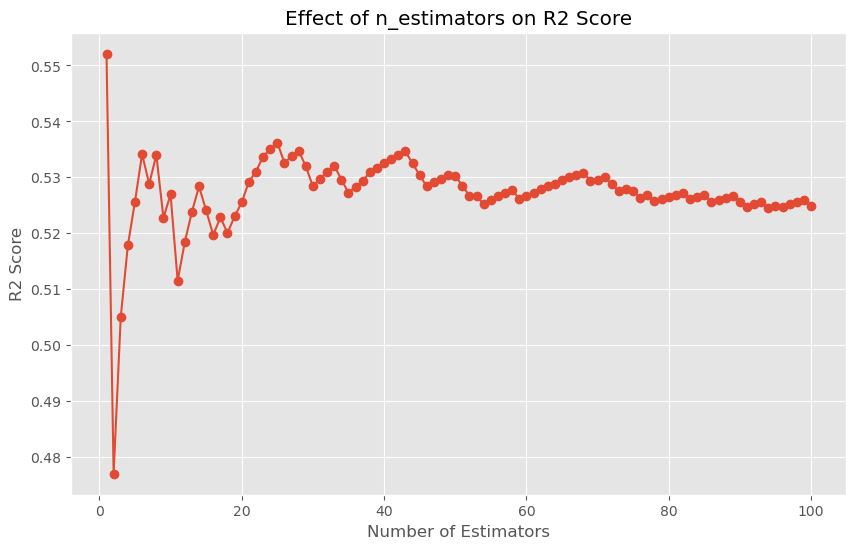

In [6]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import r2_score

# Define a range of `n_estimators` to evaluate
n_estimators_range = np.arange(1, 101, 1)

# Initialize a list to store the R2 scores for each model
r2_scores = []

# Evaluate Extra Trees model with different `n_estimators`
for n_estimators in n_estimators_range:
    model = ExtraTreesRegressor(n_estimators=n_estimators, random_state=42)
    model.fit(X_train, Y_train)
    predictions = model.predict(X_test)
    r2 = r2_score(Y_test, predictions)
    r2_scores.append(r2)

# Plotting n_estimators vs R2
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, r2_scores, marker='o', linestyle='-')
plt.title('Effect of n_estimators on R2 Score')
plt.xlabel('Number of Estimators')
plt.ylabel('R2 Score')
plt.grid(True)
plt.show()

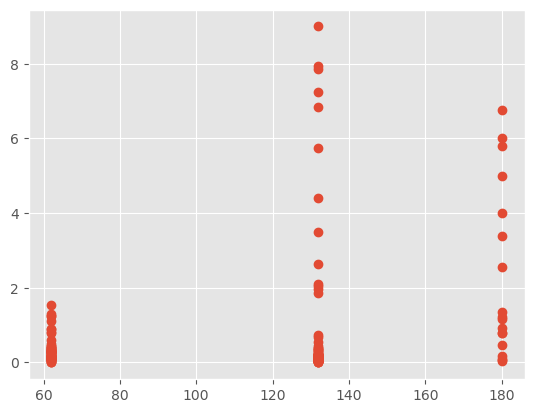

In [6]:
a=DPP_DTT_df[['solvent_boiling_point']]
plt.plot(a,DPP_DTT_Y, 'o')